# 2.a.0) **Eval IoU of ERFNet on cityscape VAL**

In [ ]:
import os
folder_path = ROOT_DIR + "/eval"
os.chdir(folder_path)

print("resize")
%run eval_iou.py --datadir "{ROOT_DIR}/datasets/Train_Dataset/" --loadDir "{ROOT_DIR}/trained_models/" --cpu
print("no resize")
%run eval_iou.py --datadir "{ROOT_DIR}/datasets/Train_Dataset/" --loadDir "{ROOT_DIR}/trained_models/" --no-resize --cpu

resize
Loading model: erfnet.py
Loading weights: C:/Users/fedeb/OneDrive/Documenti/poliTO/5anno/AML/notebook_root/trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully
C:/Users/fedeb/OneDrive/Documenti/poliTO/5anno/AML/notebook_root/datasets/Train_Dataset/leftImg8bit/val C:/Users/fedeb/OneDrive/Documenti/poliTO/5anno/AML/notebook_root/datasets/Train_Dataset/gtFine/val


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [10:53<00:00,  1.31s/it]


---------------------------------------
Took  653.6519949436188 seconds
Per-Class IoU:
97.62 Road
81.37 sidewalk
90.77 building
49.43 wall
54.93 fence
60.81 pole
62.60 traffic light
72.32 traffic sign
91.35 vegetation
60.97 terrain
93.38 sky
76.11 person
53.45 rider
92.91 car
72.78 truck
78.87 bus
63.86 train
46.41 motorcycle
71.89 bicycle
MEAN IoU:  72.20 %
no resize
Loading model: erfnet.py
Loading weights: C:/Users/fedeb/OneDrive/Documenti/poliTO/5anno/AML/notebook_root/trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully
C:/Users/fedeb/OneDrive/Documenti/poliTO/5anno/AML/notebook_root/datasets/Train_Dataset/leftImg8bit/val C:/Users/fedeb/OneDrive/Documenti/poliTO/5anno/AML/notebook_root/datasets/Train_Dataset/gtFine/val


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [41:47<00:00,  5.02s/it]

---------------------------------------
Took  2507.5471937656403 seconds
Per-Class IoU:
89.30 Road
68.76 sidewalk
80.90 building
23.60 wall
34.23 fence
54.96 pole
41.52 traffic light
61.46 traffic sign
85.60 vegetation
50.53 terrain
68.63 sky
71.30 person
36.43 rider
86.37 car
25.86 truck
46.14 bus
8.92 train
28.99 motorcycle
63.76 bicycle
MEAN IoU:  54.07 %


## Color display

resize
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


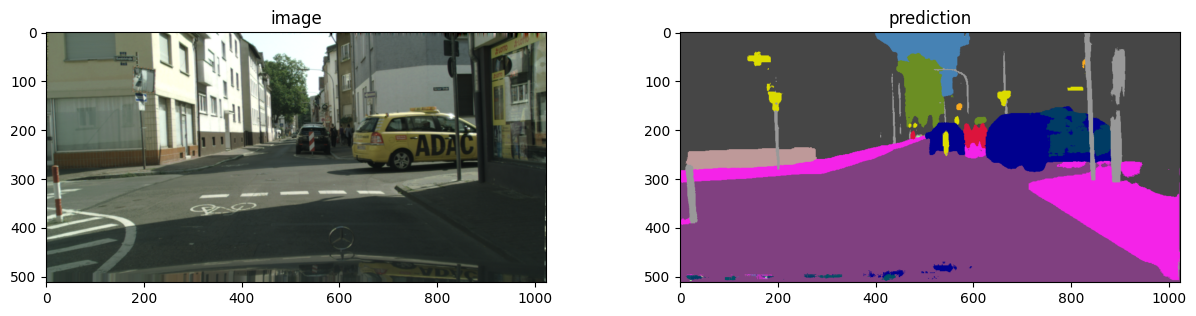

no resize
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


<Figure size 640x480 with 0 Axes>

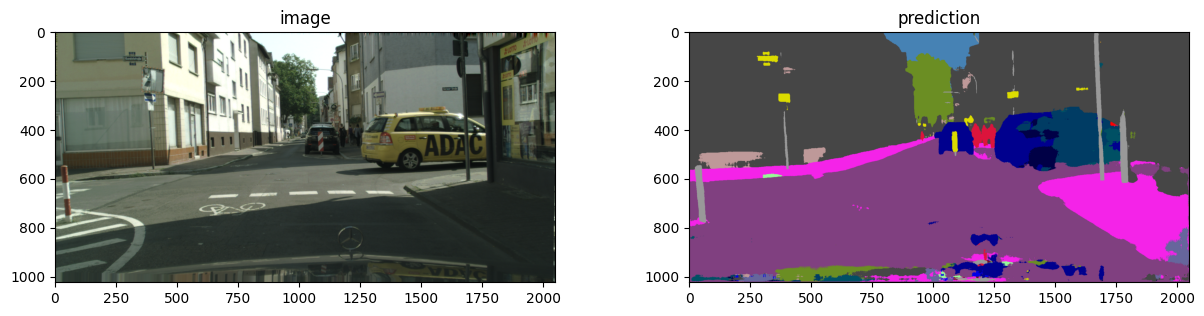

<Figure size 640x480 with 0 Axes>

In [ ]:
import os
start = os.getcwd()
folder_path = ROOT_DIR + "/eval"
os.chdir(folder_path)

print("resize")
%run eval_cityscapes_color.py --datadir "{ROOT_DIR}/datasets/Train_Dataset" --cpu
print("no resize")
%run eval_cityscapes_color.py --datadir "{ROOT_DIR}/datasets/Train_Dataset" --cpu --no-resize

ERFNet paper
```
@ARTICLE{8063438,
  author={Romera, Eduardo and Álvarez, José M. and Bergasa, Luis M. and Arroyo, Roberto},
  journal={IEEE Transactions on Intelligent Transportation Systems},
  title={ERFNet: Efficient Residual Factorized ConvNet for Real-Time Semantic Segmentation},
  year={2018},
  volume={19},
  number={1},
  pages={263-272},
  keywords={Computer architecture;Semantics;Image segmentation;Real-time systems;Kernel;Two dimensional displays;Intelligent vehicles;scene understanding;real-time;semantic segmentation;deep learning;residual layers},
  doi={10.1109/TITS.2017.2750080}}
```

# 2.a.1) MSP
# 2.a.2) max logit
# 2.a.3) entropy

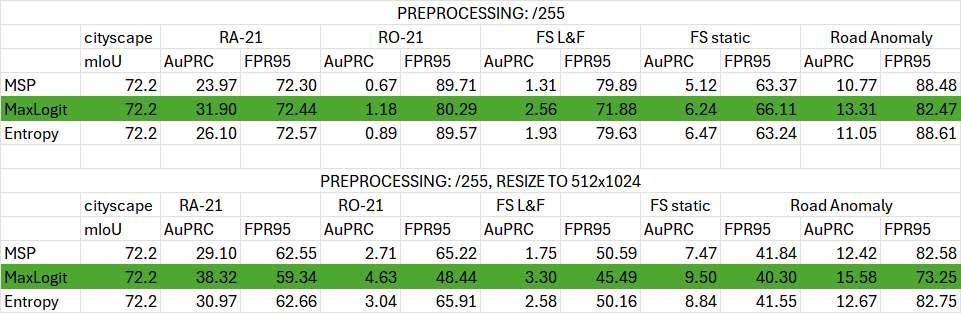

In [ ]:
#RUN BENCHMARKS
import os
import torch
start = os.getcwd()
folder_path = ROOT_DIR + "/eval"
os.chdir(folder_path)

datasets, formats =  ['RoadAnomaly21', 'RoadObsticle21', 'FS_LostFound_full', 'fs_static', 'RoadAnomaly'], ['png', 'webp', 'png', 'jpg', 'jpg']

DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") #'cpu' # 'cuda' or 'cpu'

print("run experiments on: "+DEVICE.type)

for resize in [False, True]:
  for anomaly_score in ['MSP', 'maxLogit', "entropy"]: #2.a.1, 2.a.2, 2.a.3
    for dataset,format in zip(datasets, formats):

      print(f"dataset:{dataset}, anomaly score:{anomaly_score}, device:{DEVICE}, resize to 512x1024:{resize}")

      command = f"evalAnomaly.py --input {ROOT_DIR}/datasets/Validation_Dataset/{dataset}/images/*.{format} --anomalyScore {anomaly_score}"

      if DEVICE.type == 'cpu':
        command += ' --cpu'
      if resize:
        command += ' --resize'

      %run {command}


run experiments on: cpu
dataset:RoadAnomaly21, anomaly score:MSP, device:cpu, resize to 512x1024:False
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:17<00:00,  1.75s/it]


AUPRC score: 23.966532338475844
FPR@TPR95: 72.29569145938983
dataset:RoadObsticle21, anomaly score:MSP, device:cpu, resize to 512x1024:False
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [02:02<00:00,  4.09s/it]


AUPRC score: 0.6670970202293538
FPR@TPR95: 89.7111435729924
dataset:FS_LostFound_full, anomaly score:MSP, device:cpu, resize to 512x1024:False
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [06:13<00:00,  3.73s/it]


AUPRC score: 1.305365136628029
FPR@TPR95: 79.89045720499696
dataset:fs_static, anomaly score:MSP, device:cpu, resize to 512x1024:False
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [01:59<00:00,  3.97s/it]


AUPRC score: 5.115298304327387
FPR@TPR95: 63.36723388581693
dataset:RoadAnomaly, anomaly score:MSP, device:cpu, resize to 512x1024:False
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [02:21<00:00,  2.35s/it]


AUPRC score: 10.773472865620983
FPR@TPR95: 88.47694038371668
dataset:RoadAnomaly21, anomaly score:maxLogit, device:cpu, resize to 512x1024:False
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:18<00:00,  1.89s/it]


AUPRC score: 31.89679429476221
FPR@TPR95: 72.43812705940726
dataset:RoadObsticle21, anomaly score:maxLogit, device:cpu, resize to 512x1024:False
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [02:15<00:00,  4.51s/it]


AUPRC score: 1.178215389295745
FPR@TPR95: 80.2871841923316
dataset:FS_LostFound_full, anomaly score:maxLogit, device:cpu, resize to 512x1024:False
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [08:32<00:00,  5.12s/it]


AUPRC score: 2.5620282699224535
FPR@TPR95: 71.87700548111818
dataset:fs_static, anomaly score:maxLogit, device:cpu, resize to 512x1024:False
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [02:22<00:00,  4.73s/it]


AUPRC score: 6.242292998600399
FPR@TPR95: 66.10533010755368
dataset:RoadAnomaly, anomaly score:maxLogit, device:cpu, resize to 512x1024:False
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [02:20<00:00,  2.35s/it]


AUPRC score: 13.308721162447561
FPR@TPR95: 82.4677444669702
dataset:RoadAnomaly21, anomaly score:entropy, device:cpu, resize to 512x1024:False
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:22<00:00,  2.24s/it]


AUPRC score: 26.098227671939267
FPR@TPR95: 72.57363721178194
dataset:RoadObsticle21, anomaly score:entropy, device:cpu, resize to 512x1024:False
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [02:35<00:00,  5.19s/it]


AUPRC score: 0.8912603409762851
FPR@TPR95: 89.56598261189971
dataset:FS_LostFound_full, anomaly score:entropy, device:cpu, resize to 512x1024:False
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [08:20<00:00,  5.00s/it]


AUPRC score: 1.9269760698095373
FPR@TPR95: 79.6346979752851
dataset:fs_static, anomaly score:entropy, device:cpu, resize to 512x1024:False
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [02:45<00:00,  5.52s/it]


AUPRC score: 6.474779029681896
FPR@TPR95: 63.23628859164875
dataset:RoadAnomaly, anomaly score:entropy, device:cpu, resize to 512x1024:False
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [02:12<00:00,  2.22s/it]


AUPRC score: 11.05268283572019
FPR@TPR95: 88.61466796104048
dataset:RoadAnomaly21, anomaly score:MSP, device:cpu, resize to 512x1024:True
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:12<00:00,  1.25s/it]


AUPRC score: 29.09512432005642
FPR@TPR95: 62.54880667601751
dataset:RoadObsticle21, anomaly score:MSP, device:cpu, resize to 512x1024:True
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:41<00:00,  1.38s/it]


AUPRC score: 2.709975436115573
FPR@TPR95: 65.22309081830707
dataset:FS_LostFound_full, anomaly score:MSP, device:cpu, resize to 512x1024:True
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:26<00:00,  1.47s/it]


AUPRC score: 1.7490379007091987
FPR@TPR95: 50.594021482594286
dataset:fs_static, anomaly score:MSP, device:cpu, resize to 512x1024:True
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:38<00:00,  1.30s/it]


AUPRC score: 7.4720431131345535
FPR@TPR95: 41.83688562497079
dataset:RoadAnomaly, anomaly score:MSP, device:cpu, resize to 512x1024:True
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [01:15<00:00,  1.26s/it]


AUPRC score: 12.42265085364599
FPR@TPR95: 82.57546835513841
dataset:RoadAnomaly21, anomaly score:maxLogit, device:cpu, resize to 512x1024:True
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:11<00:00,  1.11s/it]


AUPRC score: 38.319583830864154
FPR@TPR95: 59.33707908692559
dataset:RoadObsticle21, anomaly score:maxLogit, device:cpu, resize to 512x1024:True
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:36<00:00,  1.21s/it]


AUPRC score: 4.626569867515035
FPR@TPR95: 48.44343708183733
dataset:FS_LostFound_full, anomaly score:maxLogit, device:cpu, resize to 512x1024:True
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:32<00:00,  1.52s/it]


AUPRC score: 3.301439528944715
FPR@TPR95: 45.49487538553695
dataset:fs_static, anomaly score:maxLogit, device:cpu, resize to 512x1024:True
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:44<00:00,  1.48s/it]


AUPRC score: 9.498678781964719
FPR@TPR95: 40.30008812276657
dataset:RoadAnomaly, anomaly score:maxLogit, device:cpu, resize to 512x1024:True
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [01:21<00:00,  1.37s/it]


AUPRC score: 15.581983047004986
FPR@TPR95: 73.24765477868287
dataset:RoadAnomaly21, anomaly score:entropy, device:cpu, resize to 512x1024:True
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:12<00:00,  1.24s/it]


AUPRC score: 30.968614165159735
FPR@TPR95: 62.65845671952056
dataset:RoadObsticle21, anomaly score:entropy, device:cpu, resize to 512x1024:True
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:44<00:00,  1.47s/it]


AUPRC score: 3.044405335193846
FPR@TPR95: 65.91177264537156
dataset:FS_LostFound_full, anomaly score:entropy, device:cpu, resize to 512x1024:True
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:07<00:00,  1.28s/it]


AUPRC score: 2.5839553145200753
FPR@TPR95: 50.162913005936595
dataset:fs_static, anomaly score:entropy, device:cpu, resize to 512x1024:True
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:38<00:00,  1.28s/it]


AUPRC score: 8.83648604796737
FPR@TPR95: 41.54593274264038
dataset:RoadAnomaly, anomaly score:entropy, device:cpu, resize to 512x1024:True
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [01:22<00:00,  1.37s/it]


AUPRC score: 12.668527250897284
FPR@TPR95: 82.74863478696527


### Maximum Softmax probability (MSP)
#### Based on one class
***
```
@misc{hendrycks2018baseline,
      title={A Baseline for Detecting Misclassified and Out-of-Distribution Examples in Neural Networks},
      author={Dan Hendrycks and Kevin Gimpel},
      year={2018},
      eprint={1610.02136},
      archivePrefix={arXiv},
      primaryClass={cs.NE}
}
```
***
### Maximum Logits
#### Based on one class
```
@misc{hendrycks2022scaling,
      title={Scaling Out-of-Distribution Detection for Real-World Settings},
      author={Dan Hendrycks and Steven Basart and Mantas Mazeika and Andy Zou and Joe Kwon and Mohammadreza Mostajabi and Jacob Steinhardt and Dawn Song},
      year={2022},
      eprint={1911.11132},
      archivePrefix={arXiv},
      primaryClass={cs.CV}
}
```
***
### Maximum Entropy (referred as entropic score):
#### Based on all classes
```
@inproceedings{Macedo_2021,
   title={Entropic Out-of-Distribution Detection},
   url={http://dx.doi.org/10.1109/IJCNN52387.2021.9533899},
   DOI={10.1109/ijcnn52387.2021.9533899},
   booktitle={2021 International Joint Conference on Neural Networks (IJCNN)},
   publisher={IEEE},
   author={Macedo, David and Ren, Tsang Ing and Zanchettin, Cleber and Oliveira, Adriano L. I. and Ludermir, Teresa},
   year={2021},
   month=jul }

```
***

# 2.b.1) MSP t=0.5
# 2.b.2) MSP t=0.75
# 2.b.3) MSP t=1.1
# 2.b.4) other t

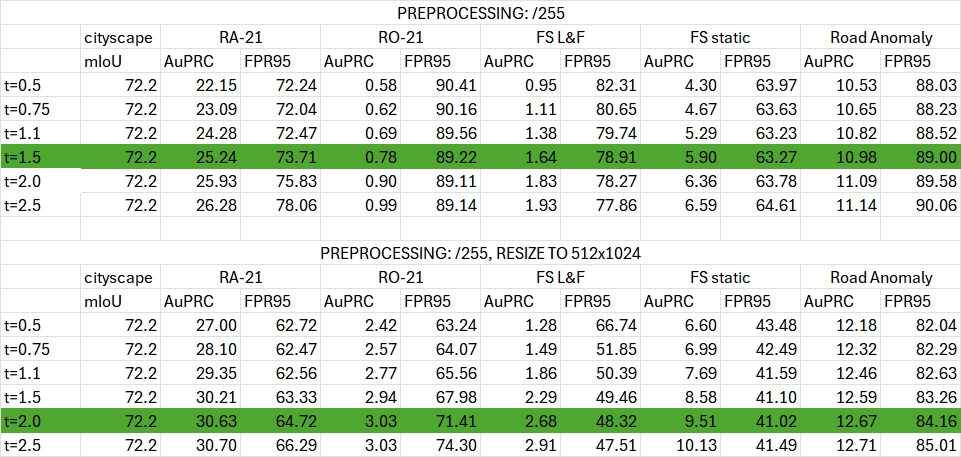

In [ ]:
import os
folder_path = ROOT_DIR + "/eval"
os.chdir(folder_path)

DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") #'cpu' # 'cuda' or 'cpu'
print("run experiments on: "+DEVICE.type)

datasets, formats =  ['RoadAnomaly21', 'RoadObsticle21', 'FS_LostFound_full', 'fs_static', 'RoadAnomaly'], ['png', 'webp', 'png', 'jpg', 'jpg']


for resize in [False, True]:
  for t in [0.5, 0.75, 1.1, 1.5, 2.0, 2.5]:
    #NOTE: t can only be an hyperparameter (not learnable through a nn)
    for dataset,format in zip(datasets, formats):

      print(f"dataset:{dataset}, MSP temperature:{t}, device:{DEVICE}, resize to 512x1024:{resize}")

      command = f"evalAnomaly.py --input {ROOT_DIR}/datasets/Validation_Dataset/{dataset}/images/*.{format} --anomalyScore MSP --temp {t}"

      if DEVICE.type == 'cpu':
        command += ' --cpu'
      if resize:
        command += ' --resize'

      %run {command}

#NOTE: the best t cannot be obtained through a Gradient Descent based algorithm due to de discrete
#search space (attempt to find a continuous space that approximate in bestT.py), an automated way to perform the hyperparameter search can be EA,
#but since they are out of the scope of this course and all the result relies on the choice of fitness function I avoided implementing it

run experiments on: cuda
dataset:RoadAnomaly21, MSP temperature:0.5, device:cuda:0, resize to 512x1024:False
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████| 10/10 [00:02<00:00,  4.28it/s]


AUPRC score: 22.15394363721917
FPR@TPR95: 72.2377141709301
dataset:RoadObsticle21, MSP temperature:0.5, device:cuda:0, resize to 512x1024:False
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████| 30/30 [00:21<00:00,  1.39it/s]


AUPRC score: 0.5819353337226851
FPR@TPR95: 90.41102249455342
dataset:FS_LostFound_full, MSP temperature:0.5, device:cuda:0, resize to 512x1024:False
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████| 100/100 [01:16<00:00,  1.30it/s]


AUPRC score: 0.946365016722648
FPR@TPR95: 82.3077920201901
dataset:fs_static, MSP temperature:0.5, device:cuda:0, resize to 512x1024:False
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████| 30/30 [00:19<00:00,  1.54it/s]


AUPRC score: 4.298634180387925
FPR@TPR95: 63.97410858596113
dataset:RoadAnomaly, MSP temperature:0.5, device:cuda:0, resize to 512x1024:False
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████| 60/60 [00:16<00:00,  3.57it/s]


AUPRC score: 10.528039375921546
FPR@TPR95: 88.03485829676416
dataset:RoadAnomaly21, MSP temperature:0.75, device:cuda:0, resize to 512x1024:False
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████| 10/10 [00:02<00:00,  4.08it/s]


AUPRC score: 23.085041407111635
FPR@TPR95: 72.03841455716942
dataset:RoadObsticle21, MSP temperature:0.75, device:cuda:0, resize to 512x1024:False
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████| 30/30 [00:22<00:00,  1.31it/s]


AUPRC score: 0.6184183349217599
FPR@TPR95: 90.15719256019274
dataset:FS_LostFound_full, MSP temperature:0.75, device:cuda:0, resize to 512x1024:False
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████| 100/100 [01:17<00:00,  1.30it/s]


AUPRC score: 1.11422761201414
FPR@TPR95: 80.64968811559058
dataset:fs_static, MSP temperature:0.75, device:cuda:0, resize to 512x1024:False
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████| 30/30 [00:19<00:00,  1.54it/s]


AUPRC score: 4.67349674498556
FPR@TPR95: 63.6323340032062
dataset:RoadAnomaly, MSP temperature:0.75, device:cuda:0, resize to 512x1024:False
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████| 60/60 [00:16<00:00,  3.61it/s]


AUPRC score: 10.654280482501516
FPR@TPR95: 88.2254112866791
dataset:RoadAnomaly21, MSP temperature:1.1, device:cuda:0, resize to 512x1024:False
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████| 10/10 [00:02<00:00,  4.14it/s]


AUPRC score: 24.277742642773383
FPR@TPR95: 72.46965157831256
dataset:RoadObsticle21, MSP temperature:1.1, device:cuda:0, resize to 512x1024:False
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████| 30/30 [00:23<00:00,  1.30it/s]


AUPRC score: 0.6887431461146274
FPR@TPR95: 89.55682012669206
dataset:FS_LostFound_full, MSP temperature:1.1, device:cuda:0, resize to 512x1024:False
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████| 100/100 [01:17<00:00,  1.30it/s]


AUPRC score: 1.3806511734227862
FPR@TPR95: 79.74024068193133
dataset:fs_static, MSP temperature:1.1, device:cuda:0, resize to 512x1024:False
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████| 30/30 [00:19<00:00,  1.54it/s]


AUPRC score: 5.293646286802183
FPR@TPR95: 63.227259883337126
dataset:RoadAnomaly, MSP temperature:1.1, device:cuda:0, resize to 512x1024:False
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████| 60/60 [00:16<00:00,  3.70it/s]


AUPRC score: 10.823552215175933
FPR@TPR95: 88.51790064192794
dataset:RoadAnomaly21, MSP temperature:1.5, device:cuda:0, resize to 512x1024:False
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████| 10/10 [00:02<00:00,  3.77it/s]


AUPRC score: 25.241199388050116
FPR@TPR95: 73.7077438001697
dataset:RoadObsticle21, MSP temperature:1.5, device:cuda:0, resize to 512x1024:False
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████| 30/30 [00:23<00:00,  1.30it/s]


AUPRC score: 0.782295497979451
FPR@TPR95: 89.22153314871584
dataset:FS_LostFound_full, MSP temperature:1.5, device:cuda:0, resize to 512x1024:False
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████| 100/100 [01:18<00:00,  1.28it/s]


AUPRC score: 1.6384280588976767
FPR@TPR95: 78.90523341936736
dataset:fs_static, MSP temperature:1.5, device:cuda:0, resize to 512x1024:False
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████| 30/30 [00:19<00:00,  1.51it/s]


AUPRC score: 5.90238323063878
FPR@TPR95: 63.26532115079924
dataset:RoadAnomaly, MSP temperature:1.5, device:cuda:0, resize to 512x1024:False
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████| 60/60 [00:16<00:00,  3.60it/s]


AUPRC score: 10.976340777724676
FPR@TPR95: 88.99679674126487
dataset:RoadAnomaly21, MSP temperature:2.0, device:cuda:0, resize to 512x1024:False
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████| 10/10 [00:02<00:00,  3.89it/s]


AUPRC score: 25.926037936137135
FPR@TPR95: 75.83487661041194
dataset:RoadObsticle21, MSP temperature:2.0, device:cuda:0, resize to 512x1024:False
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████| 30/30 [00:23<00:00,  1.27it/s]


AUPRC score: 0.8950044032277902
FPR@TPR95: 89.11284312868565
dataset:FS_LostFound_full, MSP temperature:2.0, device:cuda:0, resize to 512x1024:False
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████| 100/100 [01:18<00:00,  1.28it/s]


AUPRC score: 1.8338205030423544
FPR@TPR95: 78.26503829342468
dataset:fs_static, MSP temperature:2.0, device:cuda:0, resize to 512x1024:False
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████| 30/30 [00:19<00:00,  1.52it/s]


AUPRC score: 6.363487919148236
FPR@TPR95: 63.784362011081505
dataset:RoadAnomaly, MSP temperature:2.0, device:cuda:0, resize to 512x1024:False
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████| 60/60 [00:16<00:00,  3.54it/s]


AUPRC score: 11.086318717774642
FPR@TPR95: 89.58390257074747
dataset:RoadAnomaly21, MSP temperature:2.5, device:cuda:0, resize to 512x1024:False
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████| 10/10 [00:02<00:00,  3.96it/s]


AUPRC score: 26.275231807539008
FPR@TPR95: 78.05573084297635
dataset:RoadObsticle21, MSP temperature:2.5, device:cuda:0, resize to 512x1024:False
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████| 30/30 [00:23<00:00,  1.27it/s]


AUPRC score: 0.9882986475747011
FPR@TPR95: 89.14154380495934
dataset:FS_LostFound_full, MSP temperature:2.5, device:cuda:0, resize to 512x1024:False
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████| 100/100 [01:17<00:00,  1.29it/s]


AUPRC score: 1.9334523554810599
FPR@TPR95: 77.85673645079717
dataset:fs_static, MSP temperature:2.5, device:cuda:0, resize to 512x1024:False
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████| 30/30 [00:20<00:00,  1.50it/s]


AUPRC score: 6.589330135908401
FPR@TPR95: 64.60835766061365
dataset:RoadAnomaly, MSP temperature:2.5, device:cuda:0, resize to 512x1024:False
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████| 60/60 [00:17<00:00,  3.49it/s]


AUPRC score: 11.136656669738338
FPR@TPR95: 90.06012798059892
dataset:RoadAnomaly21, MSP temperature:0.5, device:cuda:0, resize to 512x1024:True
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████| 10/10 [00:02<00:00,  4.26it/s]


AUPRC score: 27.00467155475726
FPR@TPR95: 62.72222376052643
dataset:RoadObsticle21, MSP temperature:0.5, device:cuda:0, resize to 512x1024:True
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████| 30/30 [00:08<00:00,  3.74it/s]


AUPRC score: 2.4233469245305708
FPR@TPR95: 63.2449293767783
dataset:FS_LostFound_full, MSP temperature:0.5, device:cuda:0, resize to 512x1024:True
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████| 100/100 [00:28<00:00,  3.55it/s]


AUPRC score: 1.280250035922954
FPR@TPR95: 66.73710676943257
dataset:fs_static, MSP temperature:0.5, device:cuda:0, resize to 512x1024:True
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████| 30/30 [00:05<00:00,  5.73it/s]


AUPRC score: 6.601196954349758
FPR@TPR95: 43.47565874225287
dataset:RoadAnomaly, MSP temperature:0.5, device:cuda:0, resize to 512x1024:True
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████| 60/60 [00:10<00:00,  5.95it/s]


AUPRC score: 12.184088186139885
FPR@TPR95: 82.0355855757261
dataset:RoadAnomaly21, MSP temperature:0.75, device:cuda:0, resize to 512x1024:True
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████| 10/10 [00:01<00:00,  5.76it/s]


AUPRC score: 28.098517566468473
FPR@TPR95: 62.46600302978781
dataset:RoadObsticle21, MSP temperature:0.75, device:cuda:0, resize to 512x1024:True
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████| 30/30 [00:07<00:00,  3.85it/s]


AUPRC score: 2.5712753798180197
FPR@TPR95: 64.07125726471376
dataset:FS_LostFound_full, MSP temperature:0.75, device:cuda:0, resize to 512x1024:True
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████| 100/100 [00:28<00:00,  3.54it/s]


AUPRC score: 1.4927065584189743
FPR@TPR95: 51.84826110878898
dataset:fs_static, MSP temperature:0.75, device:cuda:0, resize to 512x1024:True
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████| 30/30 [00:05<00:00,  5.87it/s]


AUPRC score: 6.9907910960134005
FPR@TPR95: 42.49329123307483
dataset:RoadAnomaly, MSP temperature:0.75, device:cuda:0, resize to 512x1024:True
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████| 60/60 [00:10<00:00,  5.94it/s]


AUPRC score: 12.315877956493395
FPR@TPR95: 82.29455435875238
dataset:RoadAnomaly21, MSP temperature:1.1, device:cuda:0, resize to 512x1024:True
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████| 10/10 [00:01<00:00,  5.77it/s]


AUPRC score: 29.354557596135805
FPR@TPR95: 62.55956355932105
dataset:RoadObsticle21, MSP temperature:1.1, device:cuda:0, resize to 512x1024:True
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████| 30/30 [00:07<00:00,  3.83it/s]


AUPRC score: 2.7702591526333156
FPR@TPR95: 65.56084929251845
dataset:FS_LostFound_full, MSP temperature:1.1, device:cuda:0, resize to 512x1024:True
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████| 100/100 [00:27<00:00,  3.58it/s]


AUPRC score: 1.8596703086020496
FPR@TPR95: 50.38650021896347
dataset:fs_static, MSP temperature:1.1, device:cuda:0, resize to 512x1024:True
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████| 30/30 [00:05<00:00,  5.84it/s]


AUPRC score: 7.686696785691087
FPR@TPR95: 41.586844199987
dataset:RoadAnomaly, MSP temperature:1.1, device:cuda:0, resize to 512x1024:True
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████| 60/60 [00:10<00:00,  5.75it/s]


AUPRC score: 12.462894207282453
FPR@TPR95: 82.62851360050641
dataset:RoadAnomaly21, MSP temperature:1.5, device:cuda:0, resize to 512x1024:True
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████| 10/10 [00:01<00:00,  5.71it/s]


AUPRC score: 30.20715296309439
FPR@TPR95: 63.33092835324236
dataset:RoadObsticle21, MSP temperature:1.5, device:cuda:0, resize to 512x1024:True
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████| 30/30 [00:07<00:00,  3.78it/s]


AUPRC score: 2.9408655291291708
FPR@TPR95: 67.97765355264377
dataset:FS_LostFound_full, MSP temperature:1.5, device:cuda:0, resize to 512x1024:True
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████| 100/100 [00:28<00:00,  3.48it/s]


AUPRC score: 2.286483328176954
FPR@TPR95: 49.456453148821126
dataset:fs_static, MSP temperature:1.5, device:cuda:0, resize to 512x1024:True
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████| 30/30 [00:05<00:00,  5.69it/s]


AUPRC score: 8.580220010009873
FPR@TPR95: 41.0962015391614
dataset:RoadAnomaly, MSP temperature:1.5, device:cuda:0, resize to 512x1024:True
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████| 60/60 [00:10<00:00,  5.91it/s]


AUPRC score: 12.588717793810805
FPR@TPR95: 83.25597137890605
dataset:RoadAnomaly21, MSP temperature:2.0, device:cuda:0, resize to 512x1024:True
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████| 10/10 [00:01<00:00,  5.27it/s]


AUPRC score: 30.632016314509624
FPR@TPR95: 64.72264405699303
dataset:RoadObsticle21, MSP temperature:2.0, device:cuda:0, resize to 512x1024:True
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████| 30/30 [00:08<00:00,  3.63it/s]


AUPRC score: 3.0294288099280453
FPR@TPR95: 71.40789780932445
dataset:FS_LostFound_full, MSP temperature:2.0, device:cuda:0, resize to 512x1024:True
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████| 100/100 [00:28<00:00,  3.54it/s]


AUPRC score: 2.677056713766129
FPR@TPR95: 48.32367608071097
dataset:fs_static, MSP temperature:2.0, device:cuda:0, resize to 512x1024:True
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████| 30/30 [00:05<00:00,  5.45it/s]


AUPRC score: 9.508442475859109
FPR@TPR95: 41.01760874653907
dataset:RoadAnomaly, MSP temperature:2.0, device:cuda:0, resize to 512x1024:True
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████| 60/60 [00:10<00:00,  5.80it/s]


AUPRC score: 12.673480831682213
FPR@TPR95: 84.16233481754468
dataset:RoadAnomaly21, MSP temperature:2.5, device:cuda:0, resize to 512x1024:True
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████| 10/10 [00:01<00:00,  5.80it/s]


AUPRC score: 30.701547732651846
FPR@TPR95: 66.28939019895421
dataset:RoadObsticle21, MSP temperature:2.5, device:cuda:0, resize to 512x1024:True
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████| 30/30 [00:08<00:00,  3.73it/s]


AUPRC score: 3.031665617920393
FPR@TPR95: 74.30042420739544
dataset:FS_LostFound_full, MSP temperature:2.5, device:cuda:0, resize to 512x1024:True
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████| 100/100 [00:28<00:00,  3.52it/s]


AUPRC score: 2.9106107311002707
FPR@TPR95: 47.51182500133097
dataset:fs_static, MSP temperature:2.5, device:cuda:0, resize to 512x1024:True
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████| 30/30 [00:05<00:00,  5.76it/s]


AUPRC score: 10.131457419337284
FPR@TPR95: 41.48602971720054
dataset:RoadAnomaly, MSP temperature:2.5, device:cuda:0, resize to 512x1024:True
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


100%|██████████| 60/60 [00:10<00:00,  5.96it/s]


AUPRC score: 12.706378609020483
FPR@TPR95: 85.01443495216184



```
@misc{guo2017calibration,
      title={On Calibration of Modern Neural Networks},
      author={Chuan Guo and Geoff Pleiss and Yu Sun and Kilian Q. Weinberger},
      year={2017},
      eprint={1706.04599},
      archivePrefix={arXiv},
      primaryClass={cs.LG}
}
```



---



# 2) **BEST** (maxLogit) display color

no resize
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


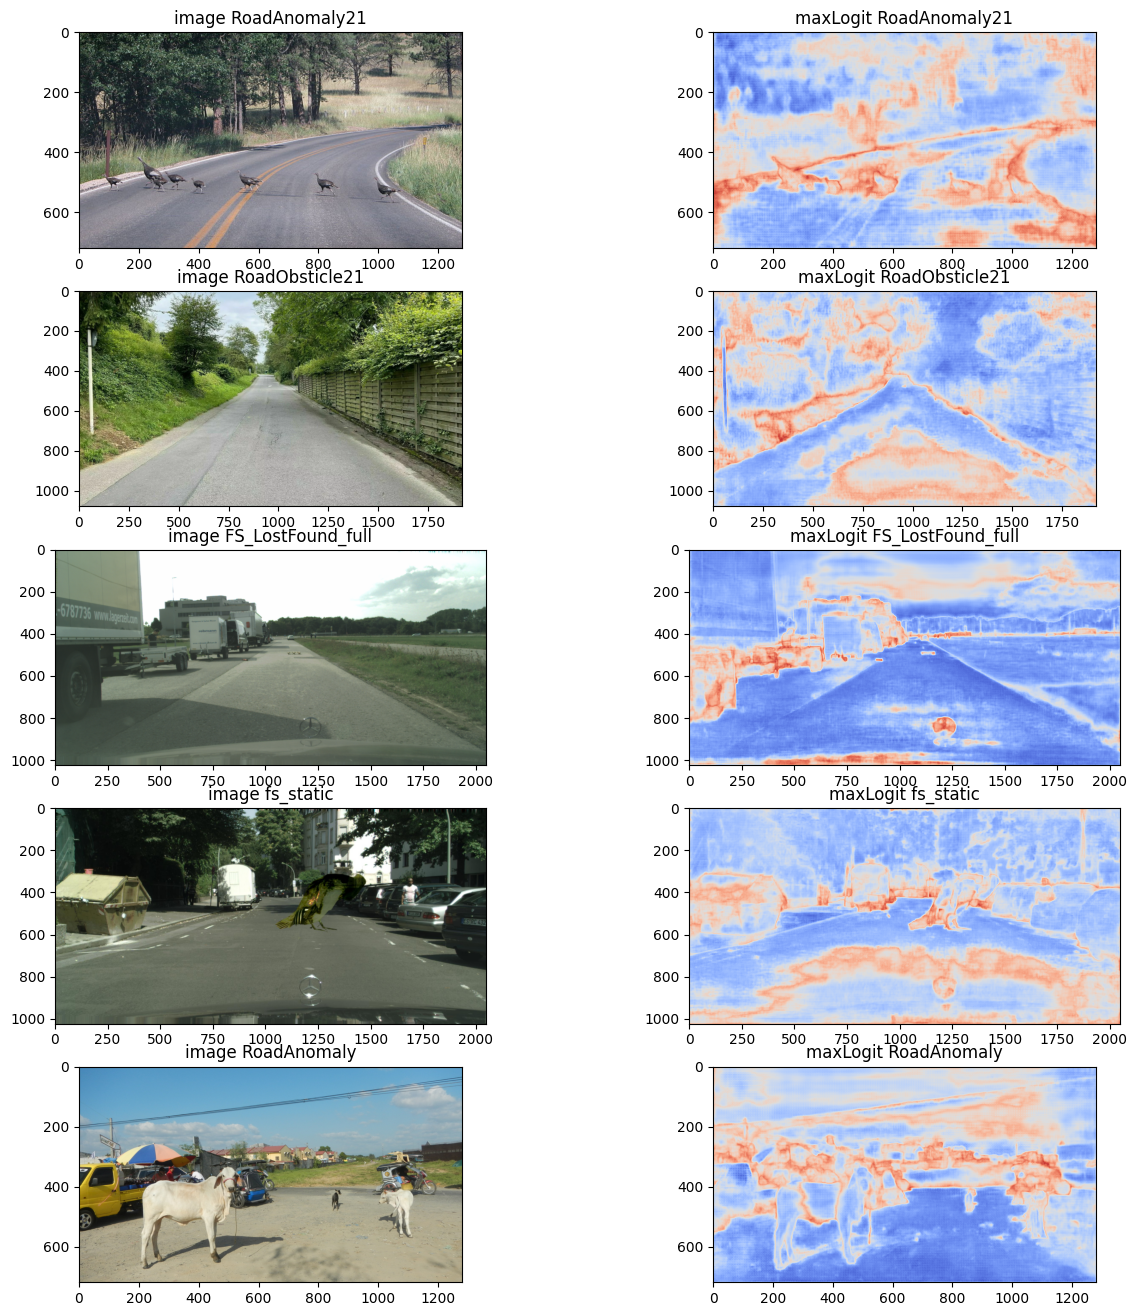

resize
Loading model: erfnet.py
Loading weights: ../trained_models/erfnet_pretrained.pth
Model and weights LOADED successfully


<Figure size 640x480 with 0 Axes>

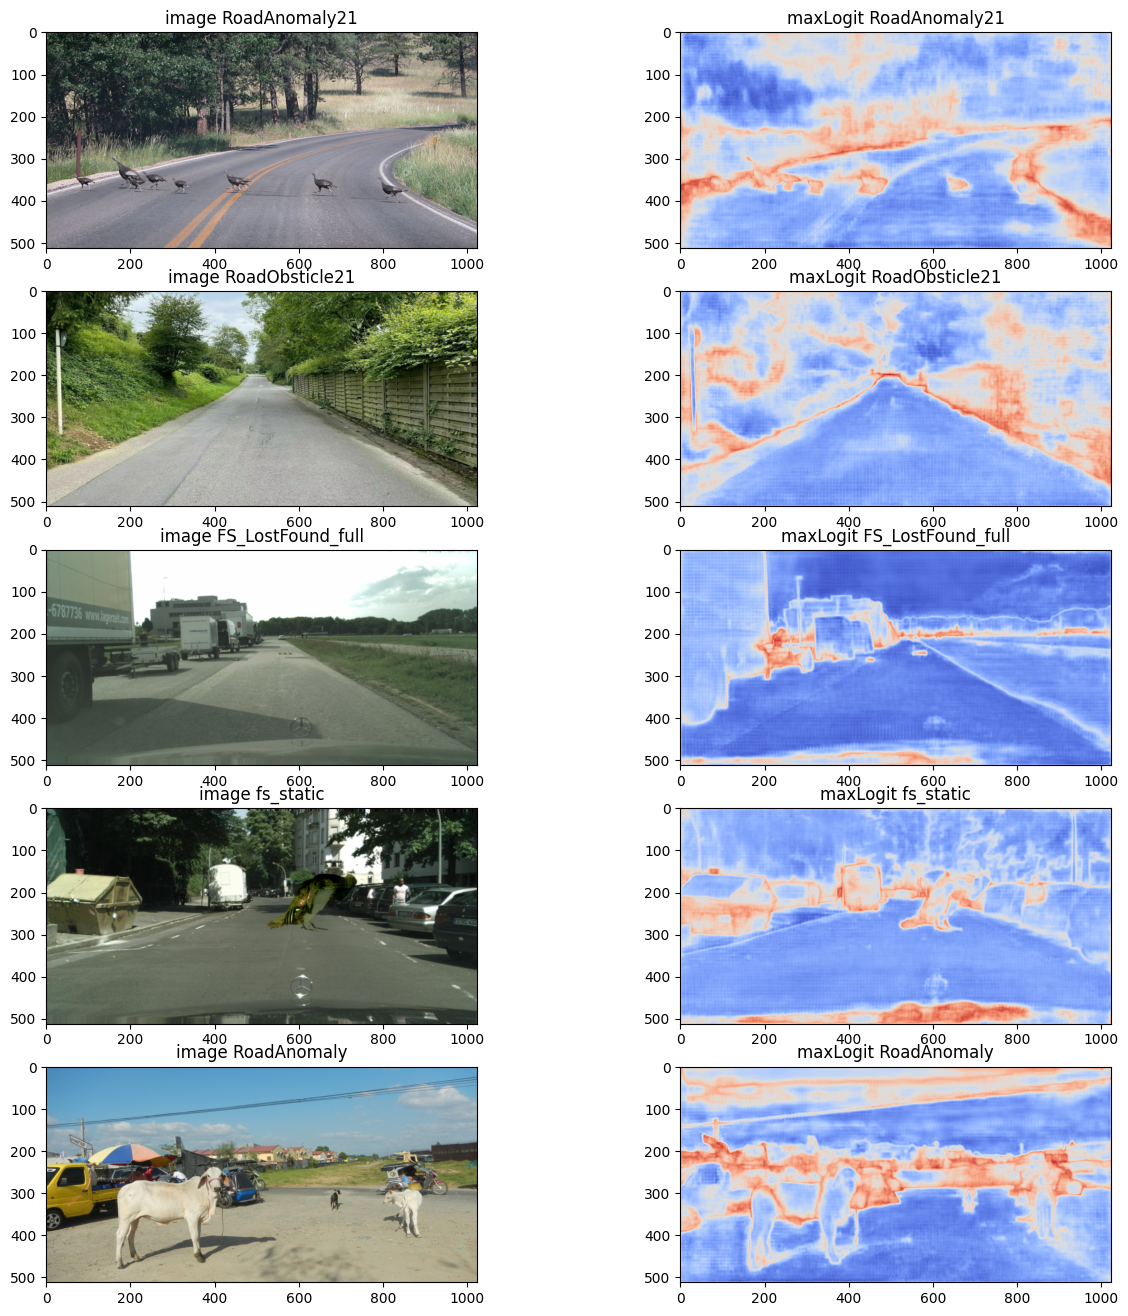

<Figure size 640x480 with 0 Axes>

In [ ]:
#VISUALIZE HEATMAP OF BEST PERFORMING ANOMALY SCORE
import os
folder_path = ROOT_DIR + "/eval"
os.chdir(folder_path)

print("no resize")
%run eval_anomaly_color.py --datadir "{ROOT_DIR}/datasets/Validation_Dataset" --cpu --no-resize
print("resize")
%run eval_anomaly_color.py --datadir "{ROOT_DIR}/datasets/Validation_Dataset" --cpu